In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [ ]:
train_df = pd.read_csv('../../datasets/insurance_train.csv')
test_df = pd.read_csv('../../datasets/insurance_test.csv')
print("insurance_train:")
display(train_df.head())

print("\n insurance_test:")
display(test_df.head())

insurance_train:


,age,sex,bmi,children,smoker,region,charges
0,26,male,27.060,0,yes,southeast,17043.34140
1,58,male,36.955,2,yes,northwest,47496.49445
2,20,female,24.420,0,yes,southeast,26125.67477
3,51,female,38.060,0,yes,southeast,44400.40640
4,62,female,25.000,0,no,southwest,13451.12200



 insurance_test:


,age,sex,bmi,children,smoker,region,charges
0,61,male,38.380,0,no,northwest,12950.07120
1,59,female,34.800,2,no,southwest,36910.60803
2,31,male,30.875,0,no,northeast,3857.75925
3,24,female,33.345,0,no,northwest,2855.43755
4,31,male,28.500,5,no,northeast,6799.45800


Пропуски train:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Пропуски test:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


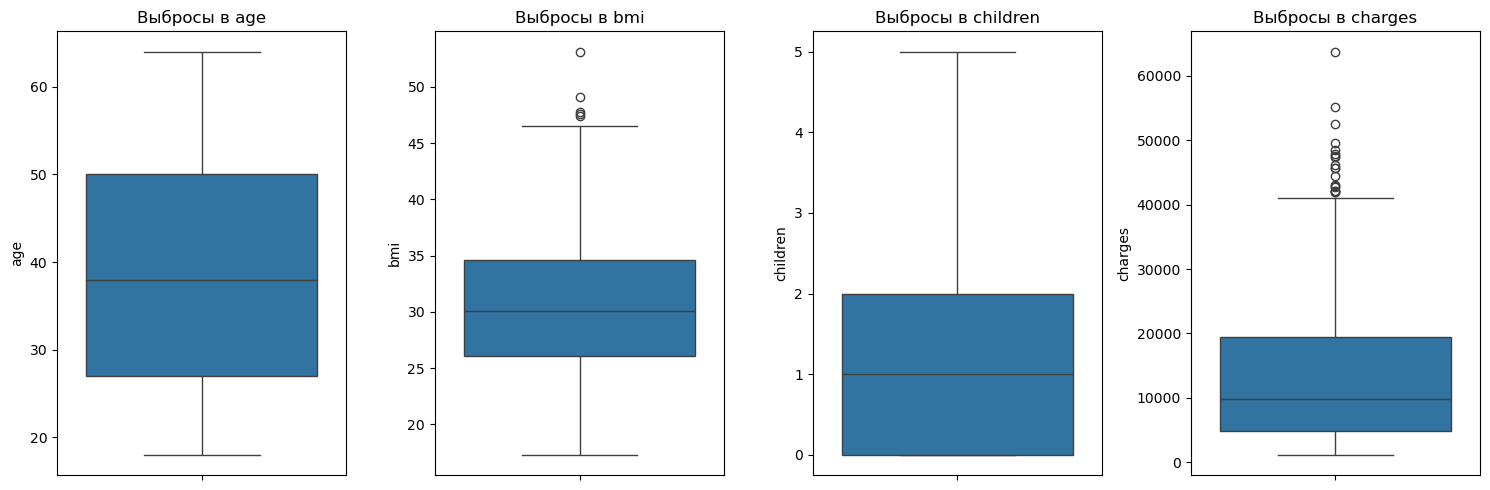

In [37]:
print("Пропуски train:")
print(train_df.isnull().sum())

print("\nПропуски test:")
print(test_df.isnull().sum())

numerical_features = ['age', 'bmi', 'children', 'charges']
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(y=train_df[feature])
    plt.title(f'Выбросы в {feature}')
plt.tight_layout()
plt.show()

In [38]:
print(f"Исходный размер train: {train_df.shape}")
Q1 = train_df['bmi'].quantile(0.25)
Q3 = train_df['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
initial_rows = train_df.shape[0]
train_df = train_df[(train_df['bmi'] >= lower_bound) & (train_df['bmi'] <= upper_bound)]

print(f"Размер train_df после удаления выбросов: {train_df.shape}")
rows_removed_bmi = initial_rows - train_df.shape[0]
print(f"Удалено строк: {rows_removed_bmi}")


initial_rows_after_bmi = train_df.shape[0]


Исходный размер train: (338, 7)
Размер train_df после удаления выбросов: (333, 7)
Удалено строк: 5


In [39]:

Q1_charges = train_df['charges'].quantile(0.25)
Q3_charges = train_df['charges'].quantile(0.75)
IQR_charges = Q3_charges - Q1_charges
lower_bound_charges = Q1_charges - 1.5 * IQR_charges
upper_bound_charges = Q3_charges + 1.5 * IQR_charges

train_df = train_df[(train_df['charges'] >= lower_bound_charges) & (train_df['charges'] <= upper_bound_charges)]

print("\n--- Удаление выбросов по 'charges' ---")
print(f"Размер train_df после удаления выбросов в 'charges': {train_df.shape}")
rows_removed_charges = initial_rows_after_bmi - train_df.shape[0]
print(f"Удалено строк после 'charges': {rows_removed_charges}")

total_rows_removed = rows_removed_bmi + rows_removed_charges
print(f"\nОбщее количество удаленных строк: {total_rows_removed}")


--- Удаление выбросов по 'charges' ---
Размер train_df после удаления выбросов в 'charges': (316, 7)
Удалено строк после 'charges': 17

Общее количество удаленных строк: 22


In [43]:
train_df_processed = pd.get_dummies(train_df, columns=['sex', 'smoker', 'region'], drop_first=True, dtype=float)
test_df_processed = pd.get_dummies(test_df, columns=['sex', 'smoker', 'region'], drop_first=True, dtype=float)

train_labels = train_df_processed['charges']
test_labels = test_df_processed['charges']

train_df_processed = train_df_processed.drop('charges', axis=1)
test_df_processed = test_df_processed.drop('charges', axis=1)
print(f"Размер train: {train_df_processed.shape}")
print(f"Размер test:   {test_df_processed.shape}")
train_df_processed.head()

Размер train: (316, 8)
Размер test:   (1000, 8)


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,26,27.06,0,1.0,1.0,0.0,1.0,0.0
2,20,24.42,0,0.0,1.0,0.0,1.0,0.0
4,62,25.00,0,0.0,0.0,0.0,0.0,1.0
5,34,32.80,1,1.0,0.0,0.0,0.0,1.0
6,18,33.77,1,1.0,0.0,0.0,1.0,0.0


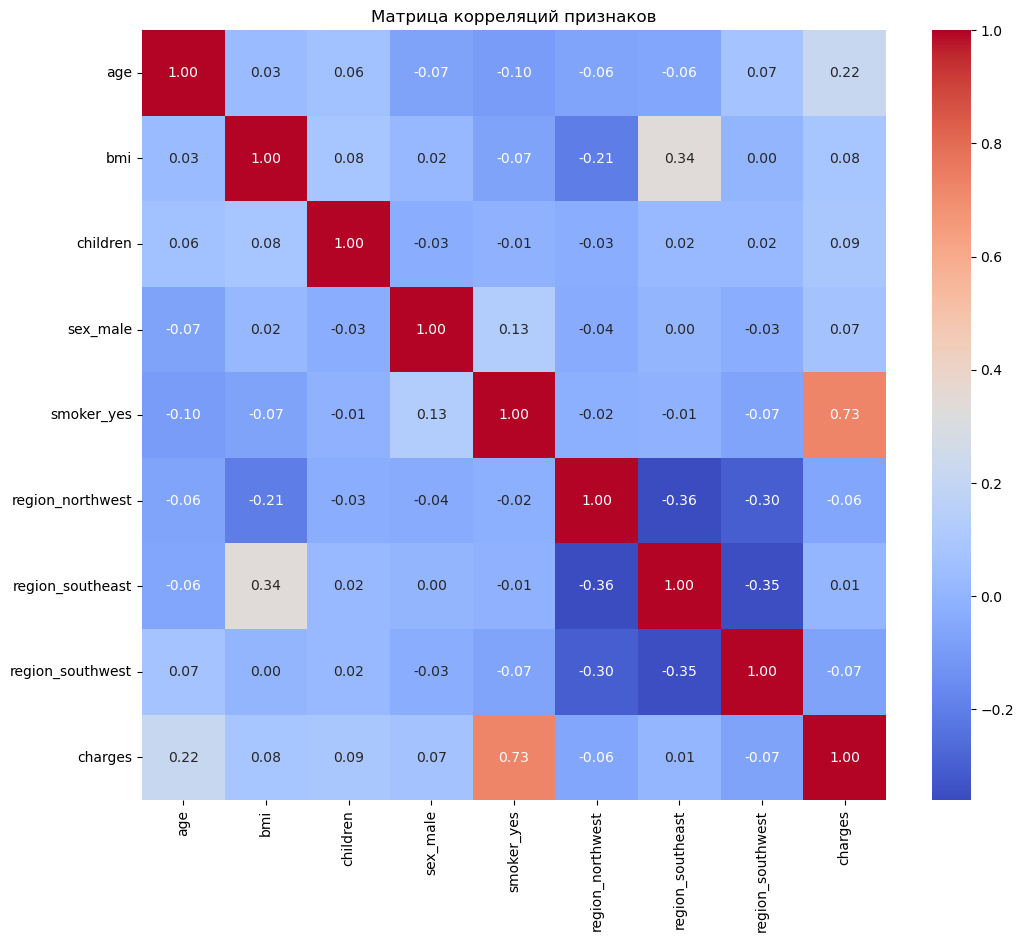

In [45]:
correlation_df = train_df_processed.copy()
correlation_df['charges'] = train_labels

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций признаков')
plt.show()

In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_df_processed)
X_test_scaled = scaler.transform(test_df_processed)
X_train_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_b = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]
y_train = train_labels.values
y_test = test_labels.values
print("Размер обучающей выборки (X):", X_train_b.shape)
print("Размер тестовой выборки (X):", X_test_b.shape)

Размер обучающей выборки (X): (316, 9)
Размер тестовой выборки (X): (1000, 9)


In [49]:
#w=(XTX)−1 XTy

def analytical_solution(X, y):
    weights = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return weights
weights_analytical = analytical_solution(X_train_b, y_train)
print("Веса:")
print(weights_analytical)

Веса:
[12183.2191294   2863.5106877   1366.47215098   701.49835791
  -118.42559122  7754.32101609  -394.41533028  -553.02712894
  -758.85186637]


Веса:
[11577.56213987  2636.59727901  1139.51937804   718.92370406
    19.17391299  7277.10249081  -347.36799961  -345.34547975
  -637.17460365]


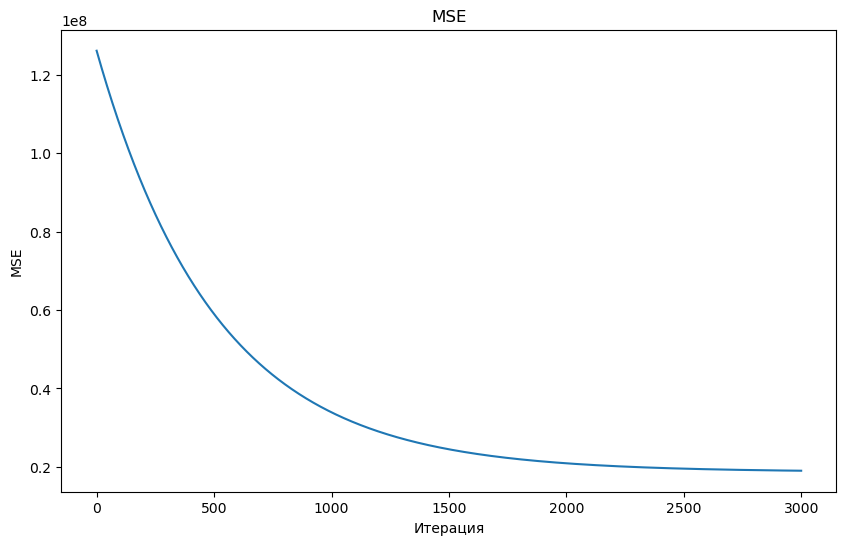

In [57]:
# численно

def gradient_descent(X, y, learning_rate, n_iterations):
    m, n = X.shape
    weights = np.zeros(n) #начальная точка
    cost_history = [] #для отслеживания значения функции потерь
    for i in range(n_iterations):
        prediction = X.dot(weights)
        error = prediction - y
        gradient = (1/m) * X.T.dot(error)
        weights = weights - learning_rate * gradient #сдвигает веса
        
        cost = (1/(2*m)) * np.sum(error**2) #MSE (стремимся минимизировать)
        cost_history.append(cost) 
    return weights, cost_history

learning_rate = 0.001
n_iterations = 3000
weights_gd, cost_history = gradient_descent(X_train_b, y_train, learning_rate, n_iterations)
print("Веса:")
print(weights_gd)
plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations), cost_history)
plt.title('MSE')
plt.xlabel('Итерация')
plt.ylabel('MSE')
plt.show()

In [62]:
#регуляризация-Гребневая Регрессия
#аналитически

def analytical_ridge_solution(X, y, lambda_):
    m, n = X.shape
    I = np.identity(n)
    I[0, 0] = 0
    term_to_invert = X.T.dot(X) + lambda_ * I # XTX + λI
    weights = np.linalg.inv(term_to_invert).dot(X.T).dot(y) #^(-1)XTy
    return weights
l_lamb = 100
weights_ridge_analytical = analytical_ridge_solution(X_train_b, y_train, l_lamb)
print("Веса:")
print(weights_ridge_analytical)

Веса:
[12183.2191294   2065.22814034   895.71366209   583.13290318
    62.75055481  5804.14261727  -301.80786073  -254.62693893
  -524.05115267]


Веса:
[11577.56213987  1999.57089519   838.66224794   585.98152929
    98.58107912  5667.31861626  -297.08383591  -210.014336
  -500.06828819]


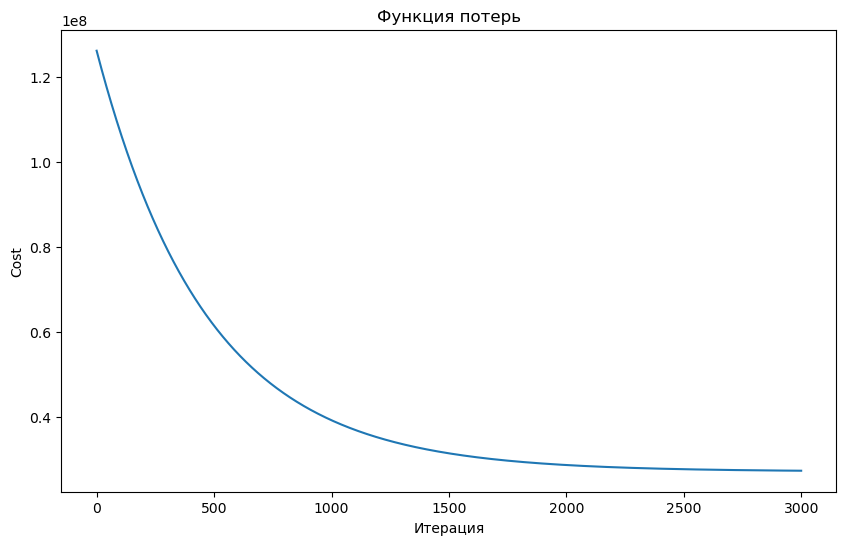

In [66]:
#численно

def grad_desc_l(X, y, learning_rate=0.01, n_iterations=1000, l_lamb=1.0):
    m, n = X.shape
    weights = np.zeros(n)
    cost_history = []
    for i in range(n_iterations):
        prediction = X.dot(weights)
        error = prediction - y
        gradient = (1/m) * X.T.dot(error)
        weights_for_reg = weights.copy()
        weights_for_reg[0] = 0
        gradient += (l_lamb/m) * weights_for_reg #добавление градиента регуляризации
        weights = weights - learning_rate * gradient #сдвиг весов
        mse_cost = (1/(2*m)) * np.sum(error**2)
        reg_cost = (l_lamb/(2*m)) * np.sum(weights_for_reg**2)
        total_cost = mse_cost + reg_cost
        cost_history.append(total_cost)
    return weights, cost_history

weights_ridge_gd, cost_history_ridge = grad_desc_l(X_train_b, y_train, learning_rate=learning_rate, n_iterations=n_iterations, l_lamb=l_lamb)
print("Веса:")
print(weights_ridge_gd)
plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations), cost_history_ridge)
plt.title('Функция потерь')
plt.xlabel('Итерация')
plt.ylabel('Cost')
plt.show()

,Модель,MSE на тесте
0,Константная модель,1.412740e+08
1,Линейная рег,3.740889e+07
2,Регрессия L2,5.005684e+07


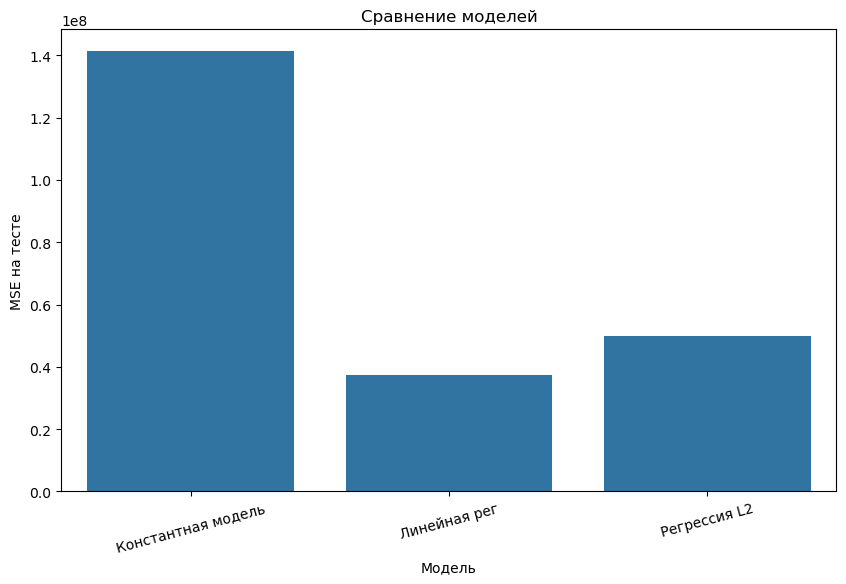

In [68]:

from sklearn.metrics import mean_squared_error
results = {}

mean_charge = y_train.mean()
y_pred_const = np.full_like(y_test, fill_value=mean_charge)
mse_const = mean_squared_error(y_test, y_pred_const)
results['Константная модель'] = mse_const

y_pred_linear = X_test_b.dot(weights_analytical)
mse_linear = mean_squared_error(y_test, y_pred_linear)
results['Линейная рег'] = mse_linear

y_pred_ridge = X_test_b.dot(weights_ridge_analytical)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
results['Регрессия L2'] = mse_ridge

results_df = pd.DataFrame(list(results.items()), columns=['Модель', 'MSE на тесте'])
display(results_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Модель', y='MSE на тесте', data=results_df)
plt.title('Сравнение моделей')
plt.xticks(rotation=15)
plt.show()
